Mean: 10.82
Median: 10.85
Mode: 5.88
Range: 9.57
Variance: 3.34
Standard Deviation: 1.83
Skewness: 0.03
Top Quartile: 11.81
Interquartile Range: 2.32


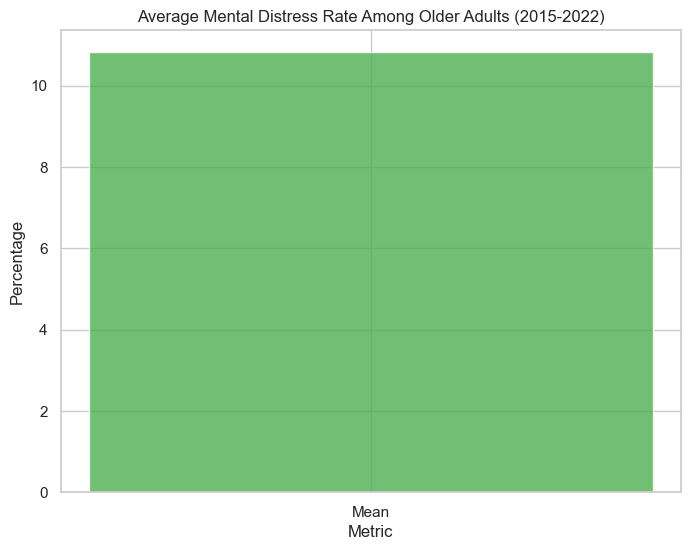

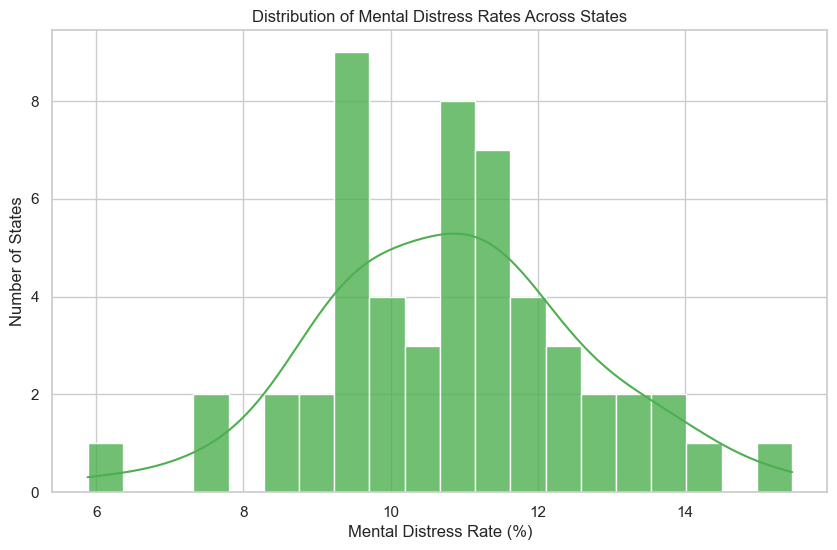

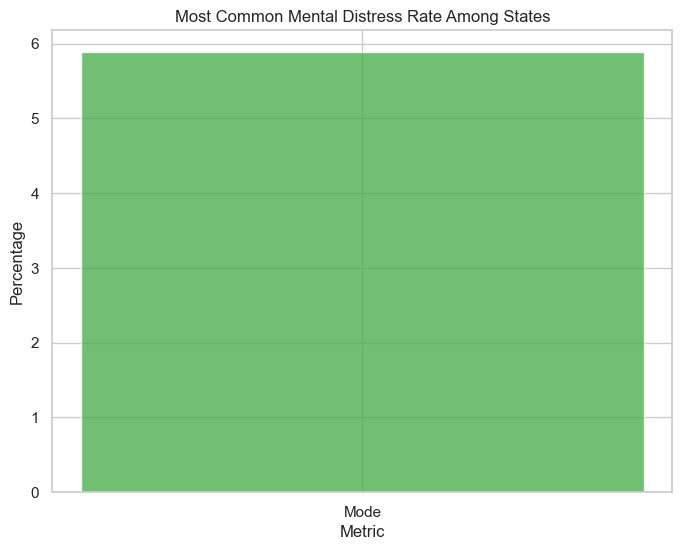

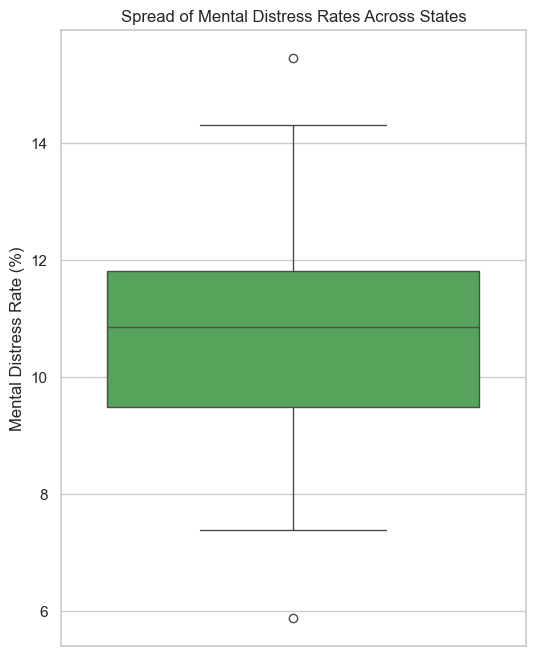

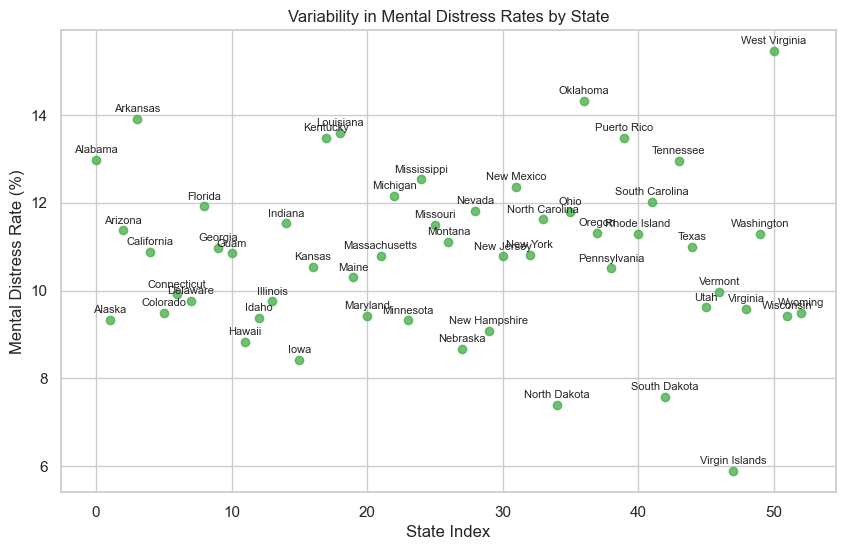

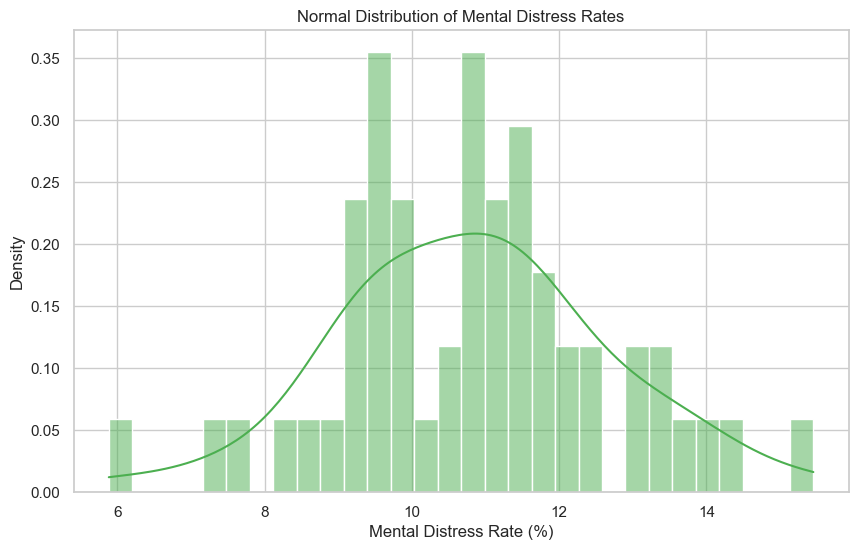

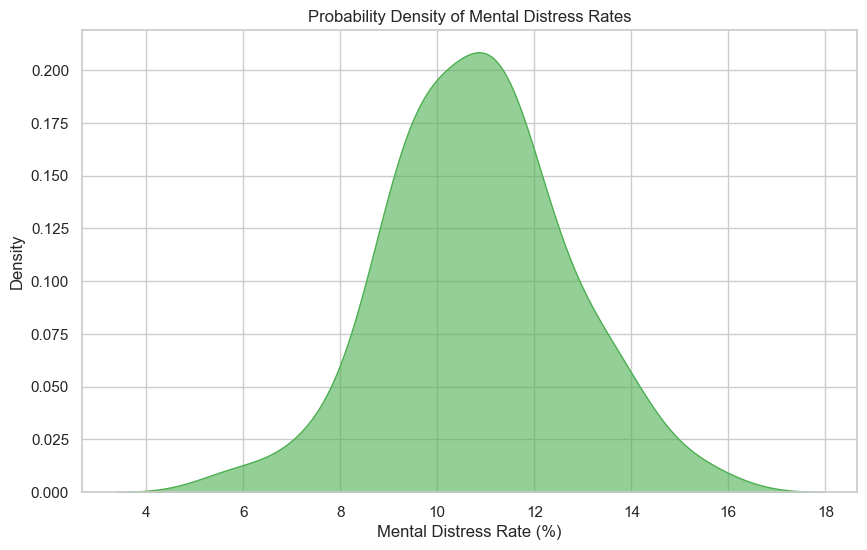

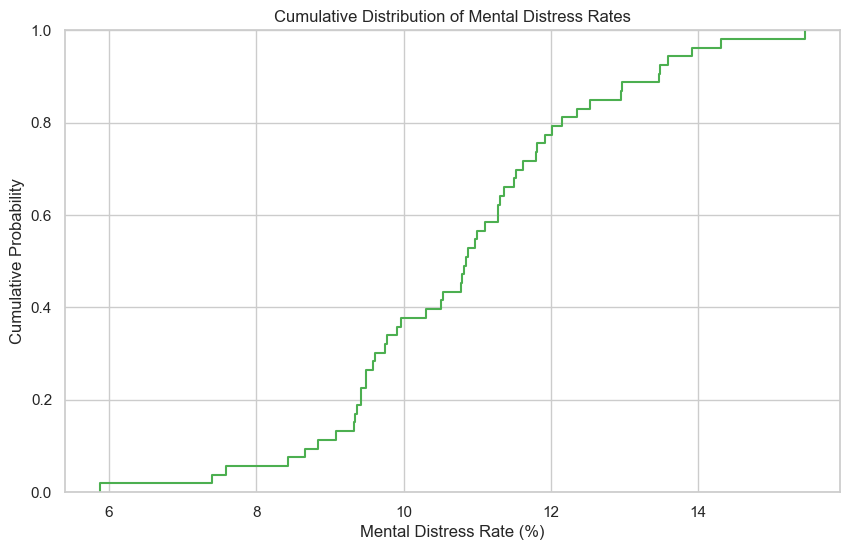

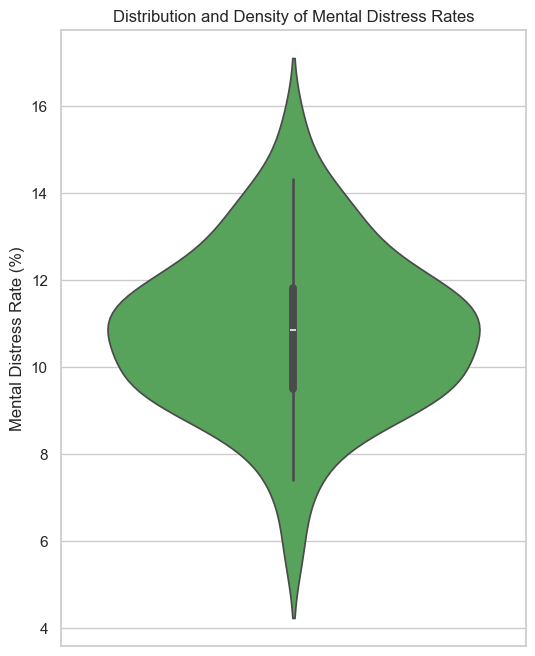

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from us import states

# Defining function to map state abbreviations to full names
def map_state_abbreviations(data, state_col='LocationAbbr'):
    # Creating a dictionary to map state abbreviations to full names
    state_mapping = {state.abbr: state.name for state in states.STATES + states.TERRITORIES}
    # Adding a new column with full state names
    data['StateFullName'] = data[state_col].map(state_mapping)
    # Returning the modified dataframe
    return data

# Required function to calculate mean
def calculate_mean(data):
    # Returning the mean
    return data.mean()

# Required function to calculate median
def calculate_median(data):
    # Returning the median
    return data.median()

# Required function to calculate mode
def calculate_mode(data):
    # Returning the mode
    return data.mode().iloc[0] if not data.mode().empty else None

# Required function to calculate range
def calculate_range(data):
    # Returning the range
    return data.max() - data.min()

# Required function to calculate variance
def calculate_variance(data):
    # Returning the variance
    return data.var()

# Required function to calculate standard deviation
def calculate_standard_deviation(data):
    # Returning the standard deviation
    return data.std()

# Additional function to calculate skewness
def calculate_skewness(data):
    # Returning the skewness
    return skew(data, nan_policy='omit')

# Additional function to calculate top quartile
def calculate_top_quartile(data):
    # Returning the top quartile
    return data.quantile(0.75)

# Additional function to calculate interquartile range (IQR)
def calculate_iqr(data):
    # Calculating the top percentile
    q1 = data.quantile(0.25)
    # Calculating the bottom percentile
    q3 = data.quantile(0.75)
    # Returning the difference between top and bottom percentile
    return q3 - q1

# Creating a consistent color scheme for all visualizations
PRIMARY_COLOR = '#4CAF50'
SECONDARY_COLOR = '#2196F3'
HIGHLIGHT_COLOR = '#FF9800'
BACKGROUND_COLOR = '#E0F7FA'
sns.set_theme(style = 'whitegrid', palette = 'pastel')

# Visualization function to create a bar chart
def bar_chart_stat(data, metric_name, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (8, 6))
    # Creating a bar plot
    plt.bar(metric_name, data, color = PRIMARY_COLOR, alpha = 0.8)
    # Setting a title
    plt.title(title)
    # Setting an x-axis label
    plt.xlabel(xlabel)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a histogram
def histogram(data, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (10, 6))
    # Creating a histogram
    sns.histplot(data, kde = True, bins = 20, color = PRIMARY_COLOR, alpha = 0.8)
    # Setting the title
    plt.title(title)
    # Setting an x-axis label
    plt.xlabel(xlabel)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a boxplot
def boxplot(data, title, ylabel):
    # Creating a new figure
    plt.figure(figsize = (6, 8))
    # Creating a boxplot
    sns.boxplot(data = data, color = PRIMARY_COLOR)
    # Setting a title
    plt.title(title)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a density plot
def density_plot(data, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (10, 6))
    # Creating a density plot
    sns.kdeplot(data, color = PRIMARY_COLOR, fill = True, alpha = 0.6)
    # Setting a title
    plt.title(title)
    # Setting an x-axis label
    plt.xlabel(xlabel)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a cumulative frequency plot
def cumulative_frequency_plot(data, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (10, 6))
    # Creating a cumulative frequency plot
    sns.ecdfplot(data, color = PRIMARY_COLOR)
    # Setting a title
    plt.title(title)
    # Setting an x-axis label
    plt.xlabel(xlabel)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a violin plot
def violin_plot(data, title, ylabel):
    # Creating a new figure
    plt.figure(figsize = (6, 8))
    # Creating a violin plot
    sns.violinplot(data = data, color = PRIMARY_COLOR)
    # Setting a title
    plt.title(title)
    # Setting a y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Visualization function to create a scatter plot with state names
def scatter_plot(data, state_names, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (10, 6))
    
    # Creating a scatter plot
    plt.scatter(range(len(data)), data, color = PRIMARY_COLOR, alpha = 0.8)
    
    # Annotating each point with the state name
    for i, state in enumerate(state_names):
        plt.annotate(state, (i, data.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    
    # Setting the title
    plt.title(title)
    
    # Setting the x-axis label
    plt.xlabel(xlabel)
    
    # Setting the y-axis label
    plt.ylabel(ylabel)
    
    # Displaying the plot
    plt.show()

# Visualization function to create a bell curve
def bell_curve(data, title, xlabel, ylabel):
    # Creating a new figure
    plt.figure(figsize = (10, 6))
    # Creating a bell curve
    sns.histplot(data, kde = True, color = PRIMARY_COLOR, bins = 30, stat = 'density')
    # Setting a title
    plt.title(title)
    # Seting an x-axis label
    plt.xlabel(xlabel)
    # Seting the y-axis label
    plt.ylabel(ylabel)
    # Displaying the plot
    plt.show()

# Setting the file path
file_path = 'Alzheimer_s_Disease_and_Healthy_Aging_Data.csv'
# Reading the file
data = pd.read_csv(file_path)

# Filtering data for years 2015-2022 (the available years)
filtered_data = data[(data['YearStart'] >= 2015) & (data['YearEnd'] <= 2022)]
# Setting the question filter (to get results from specific rows)
question_filter = 'Percentage of older adults who are experiencing frequent mental distress'
# Filtering data based on the question
filtered_data = filtered_data[filtered_data['Question'].str.contains(question_filter, na = False)]
# Converting 'Data_Value' to numerica and making any errors NaN
filtered_data['Data_Value'] = pd.to_numeric(filtered_data['Data_Value'], errors='coerce')
# Maping state abbreviations to full names
filtered_data = map_state_abbreviations(filtered_data)
# Grouping by state and calculating mean values
state_values = filtered_data.groupby('StateFullName')['Data_Value'].mean().dropna()

# Getting mean value
mean_value = calculate_mean(state_values)
# Getting median value
median_value = calculate_median(state_values)
# Getting mode value
mode_value = calculate_mode(state_values)
# Getting range value
range_value = calculate_range(state_values)
# Getting variance value
variance_value = calculate_variance(state_values)
# Getting standard deviation value
std_dev_value = calculate_standard_deviation(state_values)
# Getting skewness value
skewness_value = calculate_skewness(state_values)
# Getting top quartile value
top_quartile_value = calculate_top_quartile(state_values)
# Getting interquartile range value
iqr_value = calculate_iqr(state_values)

# Printing the results
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")
print(f"Range: {range_value:.2f}")
print(f"Variance: {variance_value:.2f}")
print(f"Standard Deviation: {std_dev_value:.2f}")
print(f"Skewness: {skewness_value:.2f}")
print(f"Top Quartile: {top_quartile_value:.2f}")
print(f"Interquartile Range: {iqr_value:.2f}")

# Creating a bar chart for mean value
bar_chart_stat([mean_value], ['Mean'], 'Average Mental Distress Rate Among Older Adults (2015-2022)', 'Metric', 'Percentage')
# Creating a histogram of state values
histogram(state_values, 'Distribution of Mental Distress Rates Across States', 'Mental Distress Rate (%)', 'Number of States')
# Creating a bar chart for mode value
bar_chart_stat([mode_value], ['Mode'], 'Most Common Mental Distress Rate Among States', 'Metric', 'Percentage')
# Creating a boxplot of state values
boxplot(state_values, 'Spread of Mental Distress Rates Across States', 'Mental Distress Rate (%)')
# Creating a scatter plot of state values
scatter_plot(state_values, state_values.index, 'Variability in Mental Distress Rates by State', 'State Index', 'Mental Distress Rate (%)')
# Creating a bell curve of state values
bell_curve(state_values, 'Normal Distribution of Mental Distress Rates', 'Mental Distress Rate (%)', 'Density')
# Creating a density plot of state values
density_plot(state_values, 'Probability Density of Mental Distress Rates', 'Mental Distress Rate (%)', 'Density')
# Creating a cumulative frequency plot of state values
cumulative_frequency_plot(state_values, 'Cumulative Distribution of Mental Distress Rates', 'Mental Distress Rate (%)', 'Cumulative Probability')
# Creating a violin plot of state values
violin_plot(state_values, 'Distribution and Density of Mental Distress Rates', 'Mental Distress Rate (%)')